In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
                            classification_report,
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            precision_recall_curve,
                            accuracy_score,
                            f1_score,
                            precision_score,
                            recall_score
)
warnings.filterwarnings("ignore")

## Quick Overview of Logistic Regression 

Y_hat(Z) = 1/ ( 1 + exp(-Z))

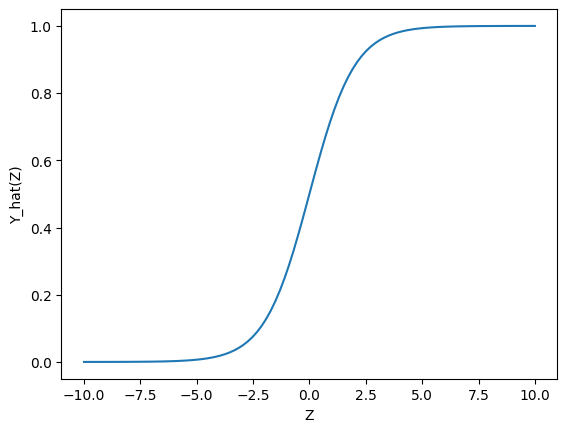

In [5]:
def sigmoid(z):
    return 1 /( 1 + np.exp(-z))

X_linspace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linspace)

plt.plot(X_linspace, Y_hat)
plt.xlabel("Z")
plt.ylabel("Y_hat(Z)")
plt.show()

## Loading the Data

In [8]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/y_test.npz')['arr_0']

In [10]:
seed = 42
np.random.seed(seed)

model_lr  = LogisticRegression(
                               random_state = 42,
                               max_iter = 1000, 
)

model_lr.fit(X_train, Y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [11]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

Y_hat_train

array([0, 0, 1, ..., 1, 1, 1], shape=(8276,))

In [12]:
# Displays the probabilities of each class seperately
Y_proba_train

array([[0.82126961, 0.17873039],
       [0.86585817, 0.13414183],
       [0.33342619, 0.66657381],
       ...,
       [0.29520416, 0.70479584],
       [0.02942656, 0.97057344],
       [0.33809661, 0.66190339]], shape=(8276, 2))

## Evaluation

In [13]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [14]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7708
Precision: 0.5460
Recall: 0.7962
F1 Score: 0.6478


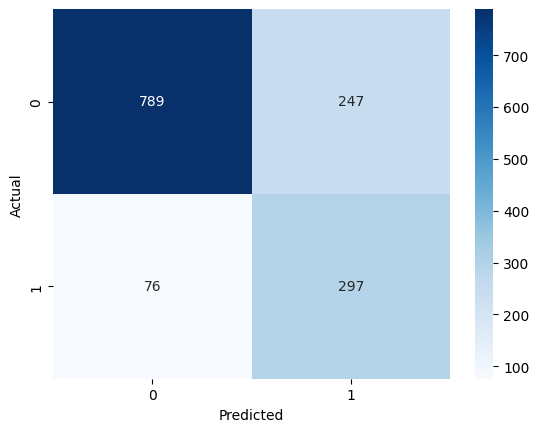

In [15]:
cm = confusion_matrix(Y_test, Y_hat_test)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()